In [6]:
# import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

In [5]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [10]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
# Remove irrelevant features from the combined dataset
columns_to_remove = ["CholCheck", "AnyHealthcare", "NoDocbcCost", "Education", "Income"]
reduced_data = data.drop(columns=columns_to_remove)

# Reverse the values of 'GenHlth'
reduced_data["GenHlth"] = 6 - reduced_data["GenHlth"]

# Display the first few rows of the reduced dataframe to verify the removal
reduced_data.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0,1.0,15.0,1.0,0.0,0.0,0,1,1,0,1.0,10.0,20.0,0.0,0,11
1,2.0,1,0.0,28.0,0.0,0.0,1.0,0,1,0,0,4.0,0.0,0.0,0.0,0,11
2,2.0,1,1.0,33.0,0.0,0.0,0.0,1,1,1,0,4.0,10.0,0.0,0.0,0,9
3,2.0,0,1.0,29.0,0.0,1.0,1.0,1,1,1,0,1.0,0.0,30.0,1.0,1,12
4,0.0,0,0.0,24.0,1.0,0.0,0.0,0,0,0,0,3.0,0.0,0.0,1.0,1,13


In [12]:
# Check for missing values in the reduced dataset
missing_values = reduced_data.isnull().sum()

missing_values  ## no missing values found

Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

## Exploratory Data Analysis

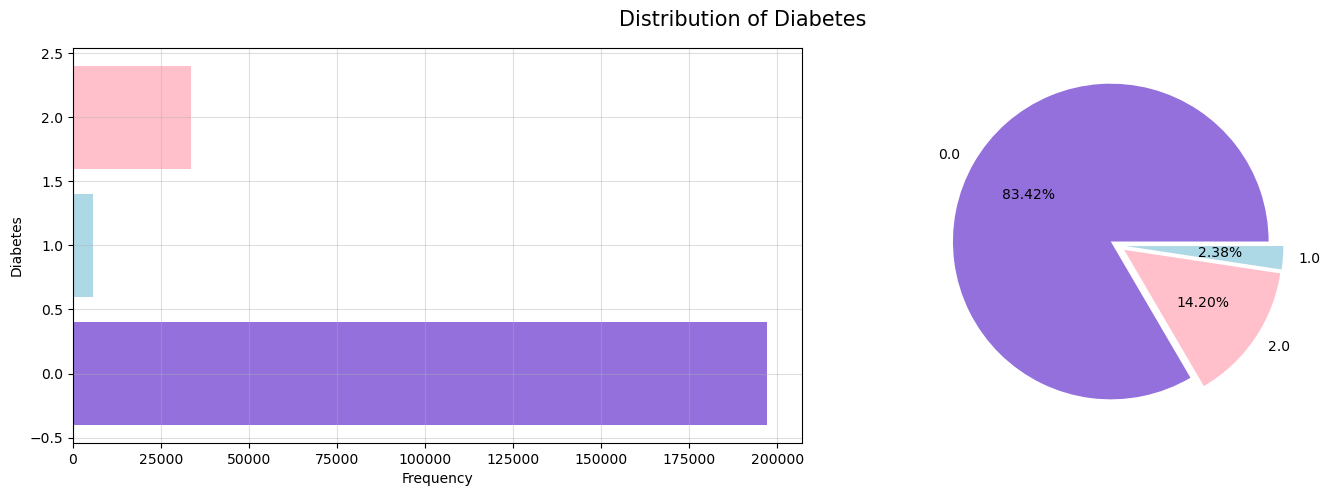

In [13]:
types = reduced_data['Diabetes_012'].value_counts()
colors = ['mediumpurple', 'pink' , "lightblue"]

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Diabetes')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Diabetes ', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


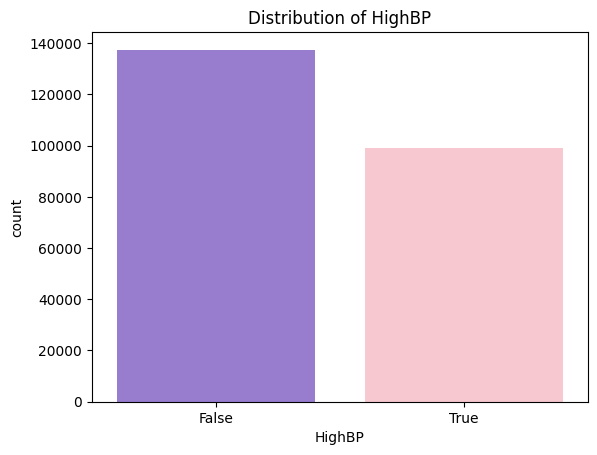

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


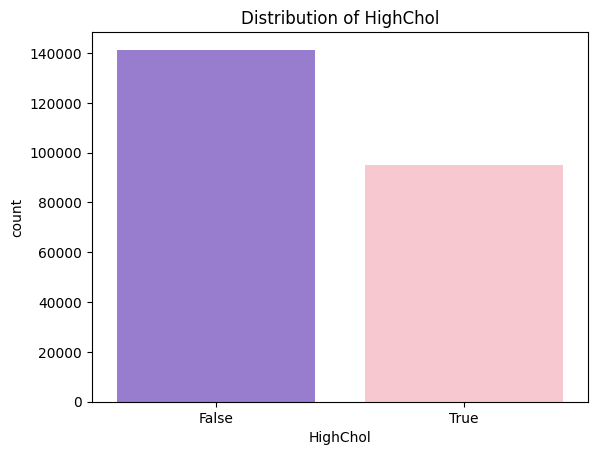

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
<ipython-input-38-e37e51932e4a>:6: UserWarning: 
The palette list has fewer values (2) than needed (84) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


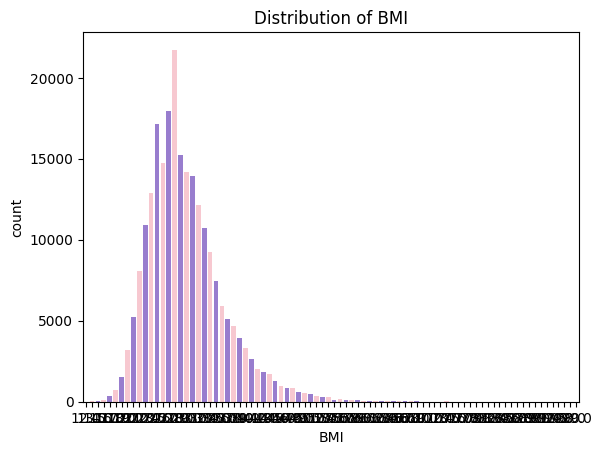

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


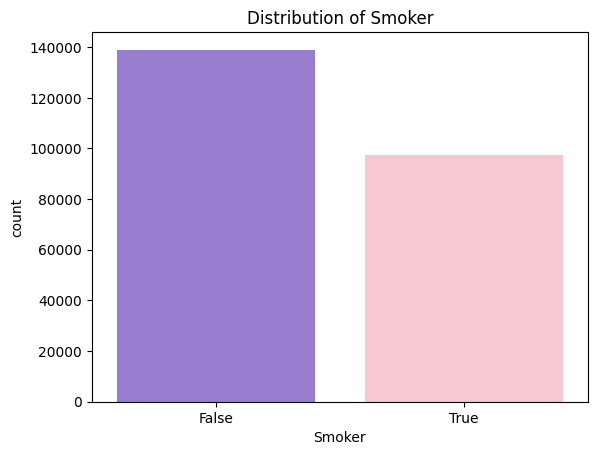

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


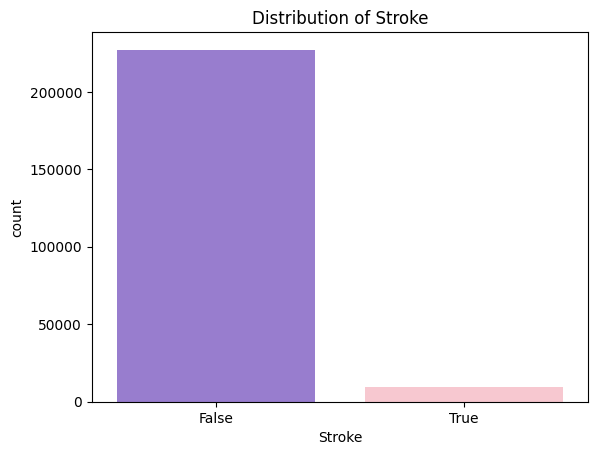

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


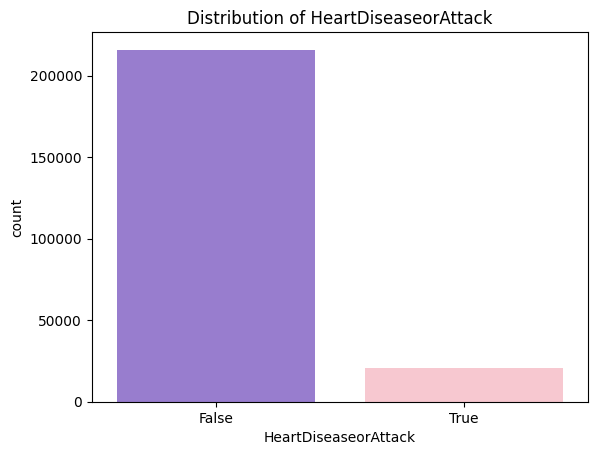

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


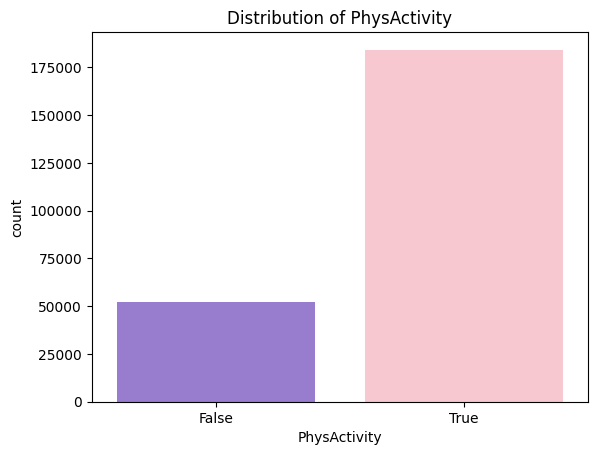

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


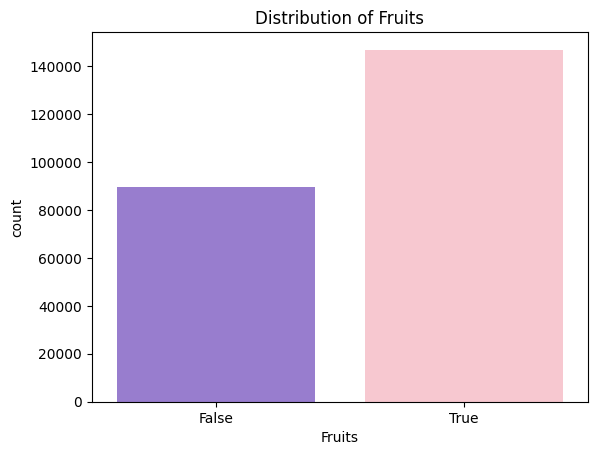

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


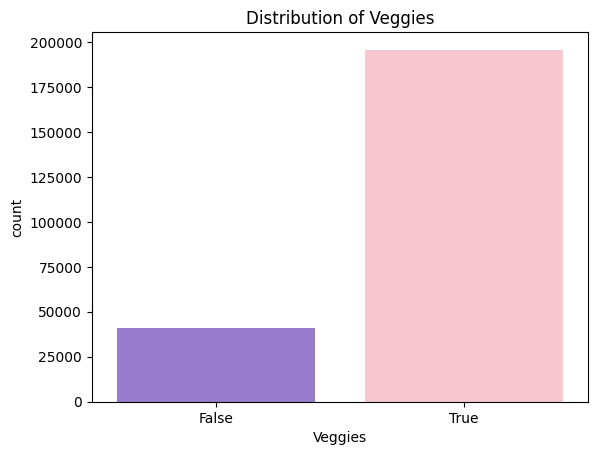

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


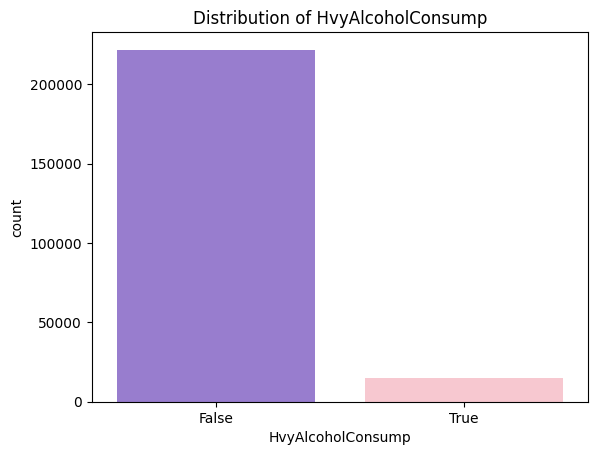

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
<ipython-input-38-e37e51932e4a>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


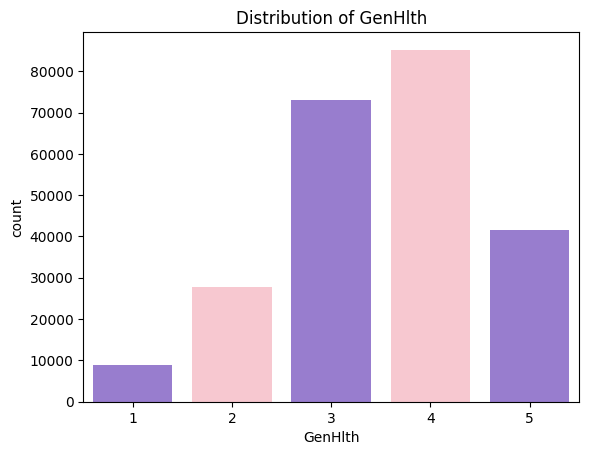

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
<ipython-input-38-e37e51932e4a>:6: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


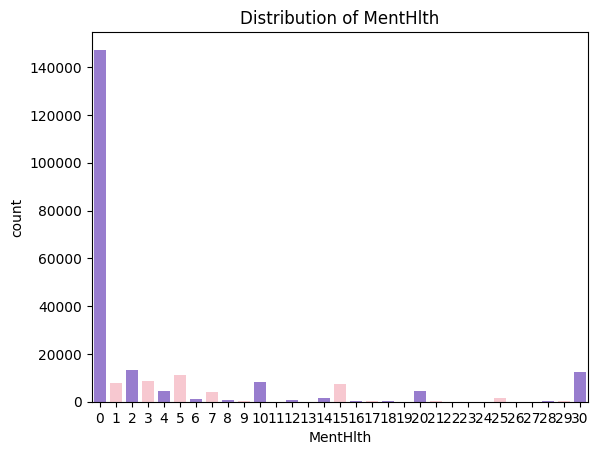

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
<ipython-input-38-e37e51932e4a>:6: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


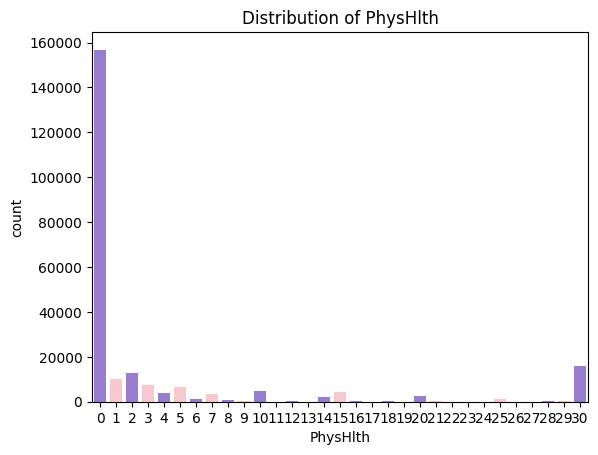

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


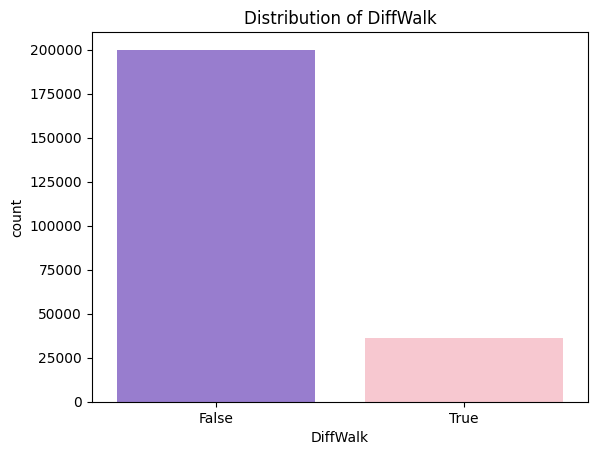

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


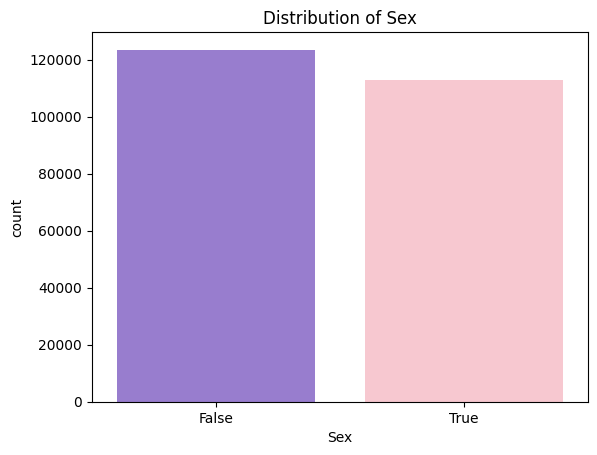

<ipython-input-38-e37e51932e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
<ipython-input-38-e37e51932e4a>:6: UserWarning: 
The palette list has fewer values (2) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors


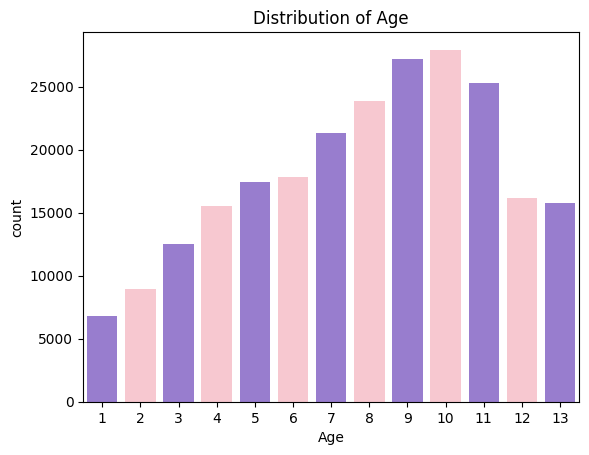

In [38]:
# Define the columns to visualize (adjust as needed)
columns_to_plot = reduced_data.columns[1:]

# Generate and display a separate countplot for each column with custom colors
for col in columns_to_plot:
    sns.countplot(x=col, data=reduced_data, palette=["mediumpurple", "pink"])  # Specify colors
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: xlabel='Age', ylabel='Count'>

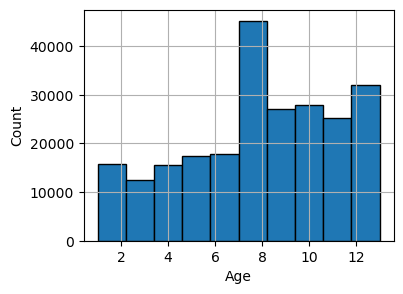

In [14]:
# plot the hist of the age variable
plt.figure(figsize=(4,3))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
reduced_data['Age'].hist(edgecolor="black")

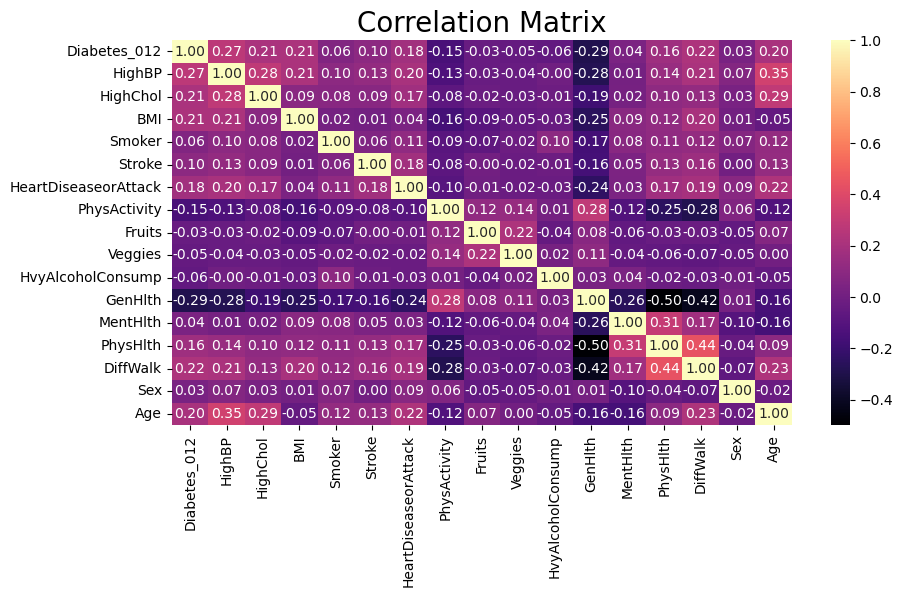

In [15]:
f,ax = plt.subplots(figsize=[10,5])
sns.heatmap(reduced_data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
# Check range of values of specified features to determine suitable data types
features_to_optimize = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]
data_types_optimization = (
    reduced_data[features_to_optimize].describe().loc[["min", "max"]]
)

# Memory used before reducing data types
memory_before = reduced_data.memory_usage(index=True).sum()

data_types_optimization

,BMI,GenHlth,MentHlth,PhysHlth,Age
min,12.0,1.0,0.0,0.0,1.0
max,99.0,5.0,30.0,30.0,13.0


In [18]:
# scale data types down to reduce memory footprint
reduced_data["BMI"] = reduced_data["BMI"].astype("float32")
reduced_data["GenHlth"] = reduced_data["GenHlth"].astype("int8")
reduced_data["MentHlth"] = reduced_data["MentHlth"].astype("int8")
reduced_data["PhysHlth"] = reduced_data["PhysHlth"].astype("int8")
reduced_data["Age"] = reduced_data["Age"].astype("int8")

# convert 1/0 binary columns to boolean values
binary_columns = [
    "Diabetes_012",
    "HighBP",
    "HighChol",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "DiffWalk",
    "Sex",
]
for column in binary_columns:
    reduced_data[column] = reduced_data[column].astype("bool")

# memory size after data type reduction
memory_after = reduced_data.memory_usage(index=True).sum()

print("Dataframe memory used before:", memory_before)
print("Dataframe memory used after:  ", memory_after)

Dataframe memory used before: 32147540
Dataframe memory used after:   4727692


## Logistic Regression Model

In [21]:
# copy Dataframe for Logistic model
log_df = reduced_data.copy(deep=True)

# Selecting numerical columns (excluding binary/boolean columns)
numerical_columns = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]

# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
scaler = MinMaxScaler()

# Fit and transform the numerical features
log_df[numerical_columns] = scaler.fit_transform(log_df[numerical_columns])

mylog_model = linear_model.LogisticRegression(solver="saga", max_iter=1000)



In [25]:
# 'X' is the feature set and 'y' is the target variable
X_log = log_df.drop("Diabetes_012", axis=1)
y_log = log_df["Diabetes_012"]  # Ensuring the target is boolean

In [26]:
# Splitting the dataset into the Training set and Test set
import sklearn.model_selection as model_selection
X_log_train, X_log_test, y_log_train, y_log_test = model_selection.train_test_split(
    X_log, y_log, test_size=0.25, random_state=42
)


In [27]:
# Train the model and output prediction of test data
mylog_model.fit(X_log_train, y_log_train)
y_pred_log = mylog_model.predict(X_log_test)

In [28]:
# Evaluate the model
accuracy_log = accuracy_score(y_log_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_log_test, y_pred_log)
class_report_log = classification_report(y_log_test, y_pred_log)

print("\nLogistic Regression (single) prediction results:", "\n")
print(f"Accuracy: {round(accuracy_log*100,2)} %", "\n")


Logistic Regression (single) prediction results: 

Accuracy: 84.13 % 



In [30]:
print("Confusion Matrix:")
print(conf_matrix_log, "\n")


Confusion Matrix:
[[47973  1404]
 [ 7972  1746]] 



In [31]:
print("Classification Report:")
print(class_report_log)

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.97      0.91     49377
        True       0.55      0.18      0.27      9718

    accuracy                           0.84     59095
   macro avg       0.71      0.58      0.59     59095
weighted avg       0.81      0.84      0.81     59095

